In [59]:
%%capture
!sudo apt-get install poppler-utils tesseract-ocr

In [60]:
!pip install "unstructured[all-docs]" pillow

In [61]:
!rm -rf ./data
!rm -rf figures

In [62]:
raw_pdf_elements = []

In [63]:
# !export EXTRACT_IMAGE_BLOCK_CROP_VERTICAL_PAD=30
# !export EXTRACT_IMAGE_BLOCK_CROP_HORIZONTAL_PAD=30

In [64]:
import requests
import os

# Downloading the dataset - URL of the "Attention Is All You Need" paper (Replace it with the URL of the PDF file/dataset you want to download)
url = "https://www.verizon.com/business/resources/whitepapers/wireless-business-internet-support-legacy-for-tdm-services.pdf"  # Attention is all you need

# Set the filename and filepath
filename = "vz_doc.pdf"
filepath = os.path.join("data", filename)

# Create the data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(filepath, 'wb') as file:
        file.write(response.content)
    print(f"File downloaded successfully: {filepath}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded successfully: data/vz_doc.pdf


In [65]:
import os
import base64
from tqdm import tqdm
from unstructured.partition.pdf import partition_pdf
from bs4 import BeautifulSoup
import csv
from PIL import Image
from PIL.Image import Resampling
from io import BytesIO

In [66]:
# !pip install nltk --upgrade
# import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')

In [67]:
# Process the PDF
raw_pdf_elements = partition_pdf(
    # url=None,
    filename=filepath,
    # extract_images_in_pdf=True,
    extract_element_types=["Image", "Table"],
    extract_image_block_types=["Image", "Table"],
    # infer_table_structure=True,
    strategy="hi_res",
    extract_to_payload=True,
    extract_image_block_to_payload=True
    # chunking_strategy="by_title",
    # max_characters=8000,
    # new_after_n_chars=7800,
    # # combine_text_under_n_chars=6000,
    # extract_image_block_output_dir=raw_images_dir,
)


Image
{'coordinates': {'points': ((-79.79425333333333, -69.29270416666655), (-79.79425333333333, 1108.8598808333334), (1779.7942002777777, 1108.8598808333334), (1779.7942002777777, -69.29270416666655)), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'last_modified': '2024-12-12T10:19:17', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCASaB0QDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAE

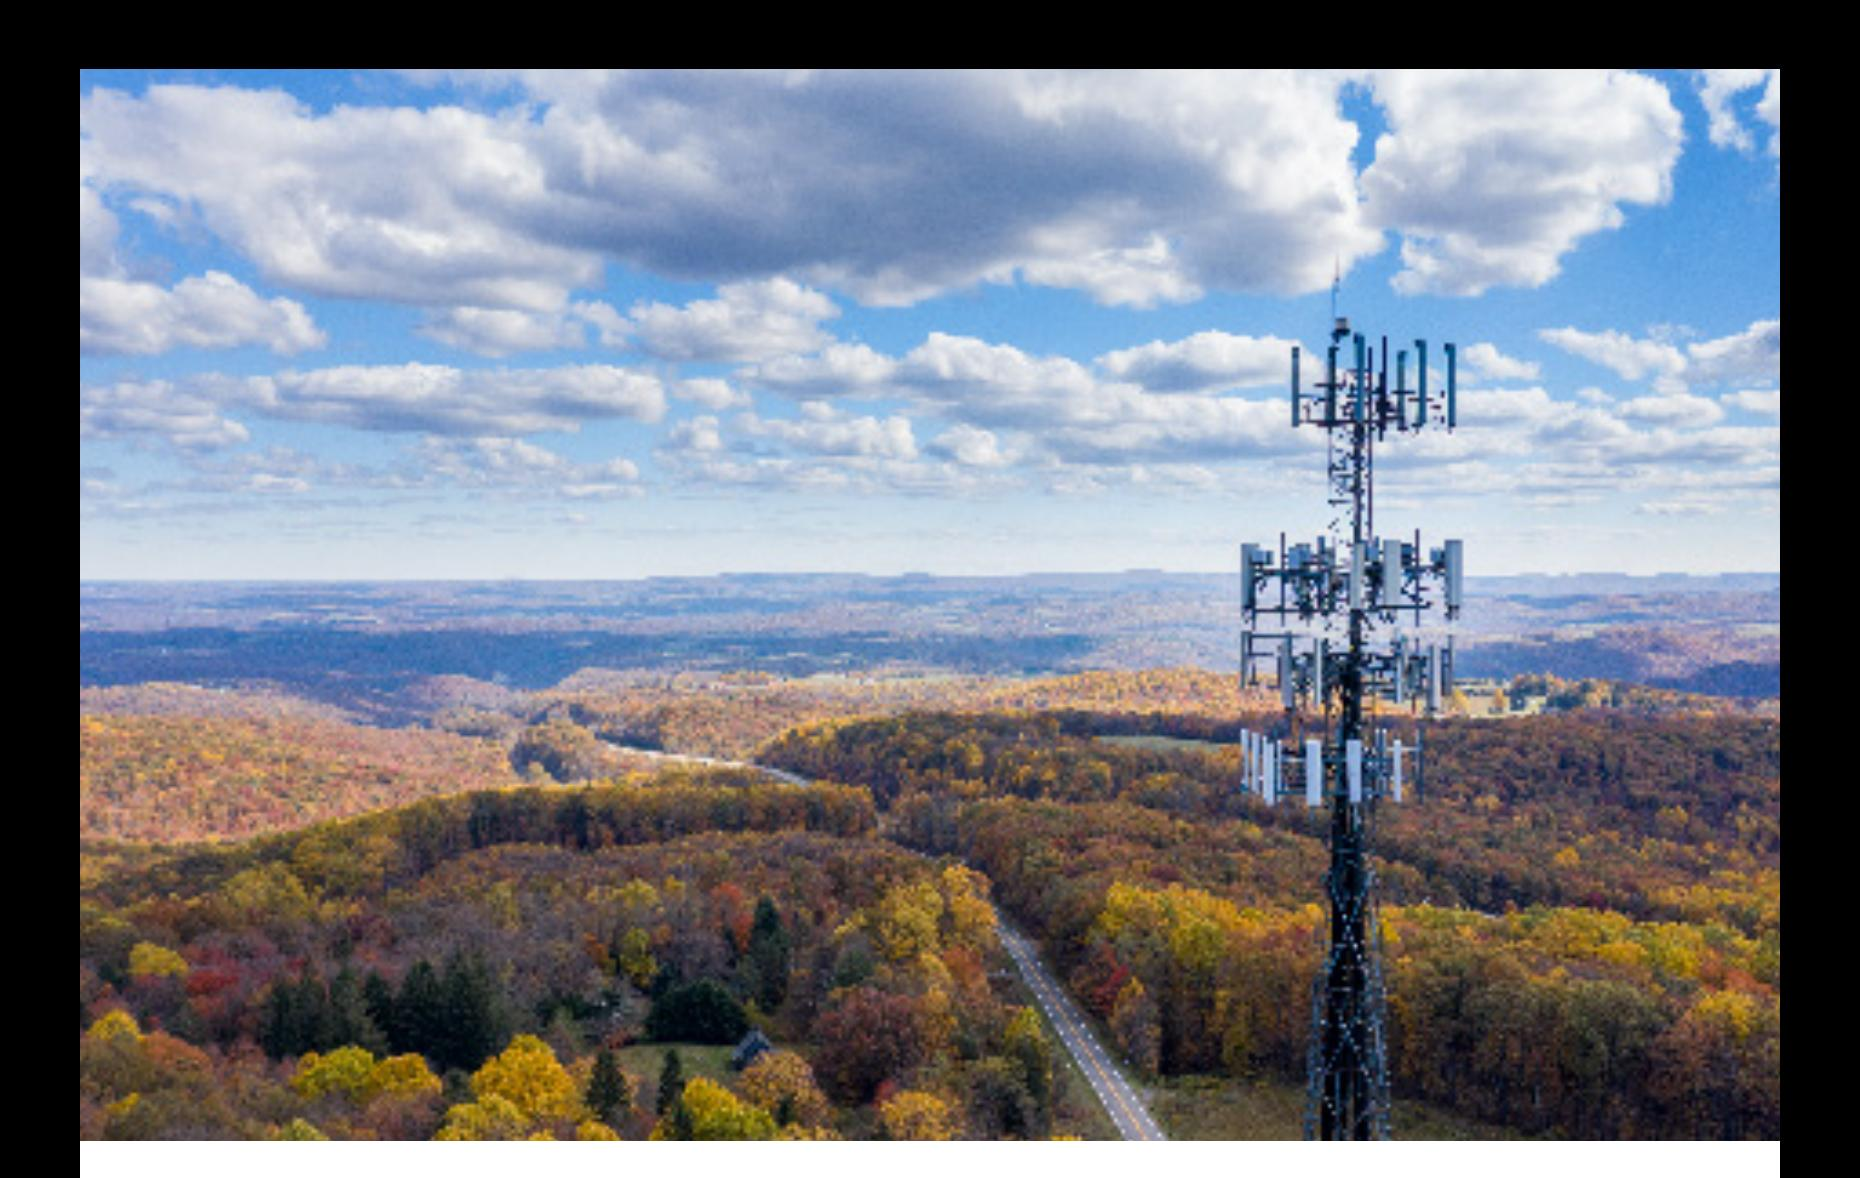

In [68]:
import base64
from IPython.display import Image, display

# First element is image, so giving `break` and displaying it.
for element in raw_pdf_elements:
   print(element.category)
   print(element.metadata.to_dict())
   print(element.metadata.to_dict()['image_base64'])
   # Decode the base64 string
   image_data = base64.b64decode(element.metadata.to_dict()['image_base64'])
   # Display the image
   display(Image(data=image_data))
   break

In [69]:
raw_pdf_elements

In [70]:
set_of_element_types = set()
for elements in raw_pdf_elements:
  # print((type(element)))
  # Append the elements type to the set
  set_of_element_types.add(str(type(element)))

print(set_of_element_types)

{"<class 'unstructured.documents.elements.Image'>"}


In [71]:
# # To get a list of all available attributes in metadata, you can use:
# metadata_attributes = vars(raw_pdf_elements[0].metadata)
# print(metadata_attributes)

{'coordinates': CoordinatesMetadata(points=((-79.79425333333333, -69.29270416666655), (-79.79425333333333, 1108.8598808333334), (1779.7942002777777, 1108.8598808333334), (1779.7942002777777, -69.29270416666655)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e225f3d0>), 'links': [], 'last_modified': '2024-12-12T10:19:17', '_known_field_names': frozenset({'parent_id', 'languages', 'key_value_pairs', 'bcc_recipient', 'attached_to_filename', 'file_directory', 'image_base64', 'sent_to', 'link_texts', 'category_depth', 'cc_recipient', 'table_as_cells', 'emphasized_text_tags', 'sent_from', 'orig_elements', 'emphasized_text_contents', 'page_name', 'is_continuation', 'url', 'links', 'filename', 'detection_class_prob', 'coordinates', 'last_modified', 'data_source', 'image_mime_type', 'signature', 'link_urls', 'image_path', 'subject', 'text_as_html', 'email_message_id', 'link_start_indexes', 'detection_origin', 'page_number', 'header_footer_type', 'filetype'}), 'filetype'

In [72]:
# To get a list of all available attributes in metadata, you can use:
metadata_attributes = vars(raw_pdf_elements[0].metadata)
print(metadata_attributes)

# Then you can iterate through the attribute names and access their values:
for attr_name in metadata_attributes:
    attr_value = getattr(raw_pdf_elements[0].metadata, attr_name)
    print(f"{attr_name}: {attr_value}")

coordinates: CoordinatesMetadata(points=((-79.79425333333333, -69.29270416666655), (-79.79425333333333, 1108.8598808333334), (1779.7942002777777, 1108.8598808333334), (1779.7942002777777, -69.29270416666655)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e225f3d0>)
links: []
last_modified: 2024-12-12T10:19:17
_known_field_names: frozenset({'parent_id', 'languages', 'key_value_pairs', 'bcc_recipient', 'attached_to_filename', 'file_directory', 'image_base64', 'sent_to', 'link_texts', 'category_depth', 'cc_recipient', 'table_as_cells', 'emphasized_text_tags', 'sent_from', 'orig_elements', 'emphasized_text_contents', 'page_name', 'is_continuation', 'url', 'links', 'filename', 'detection_class_prob', 'coordinates', 'last_modified', 'data_source', 'image_mime_type', 'signature', 'link_urls', 'image_path', 'subject', 'text_as_html', 'email_message_id', 'link_start_indexes', 'detection_origin', 'page_number', 'header_footer_type', 'filetype'})
filetype: application/pdf

In [73]:
for idx, element in enumerate(raw_pdf_elements):
    if "unstructured.documents.elements.Table" in str(type(element)):
        raw_text = str(element)
        print(raw_text)
        print(element.metadata.coordinates)
        print(element.metadata.page_number)

Oﬃce in a box Connectivity for new, temporary, or home oﬃces. Often paired with voice over IP system Example: Portable plug and play router with VPN access for remote workers that is quick to deploy Secondary or Tertiary network backup. Especially crucial with a single point of entry for redundancy Network resiliency wireline downtime Branches or oﬃces with lack of, or old and expensive, wired connectivity options Remote locations Example: Enterprise grade router or adapter paired with a high gain OmnI/ Directional antenna for improved bandwidth Parallel network Connectivity that is not connected to internal networks for security reasons, such as public or private internet Example: Primary connectivity for segmenting traﬃc to manage bandwidth consumption on core network Single point of connection in any vehicle Mobile connectivity Example: Mobile connection in vehicles to provide primary connectivity to devices inside (MDT for Law Enforcement) Copper replacement Plain Old Telephone Ser

In [74]:
for idx, element in enumerate(raw_pdf_elements):
    if "unstructured.documents.elements.FigureCaption" in str(type(element)):
        raw_text = str(element)
        print(raw_text)
        print(element.metadata.coordinates)
        print(element.metadata.page_number)

Figure 1. Primary access to public and private networks
CoordinatesMetadata(points=((616.642333984375, 877.4447222222223), (616.642333984375, 899.7113888888888), (1138.6444444444448, 899.7113888888888), (1138.6444444444448, 877.4447222222223)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e2435960>)
4
Figure 3. Creating last-mile network access diversity.
CoordinatesMetadata(points=((616.6666666666666, 354.51824951171875), (616.6666666666666, 378.3193664550781), (1118.7101802777777, 378.3193664550781), (1118.7101802777777, 354.51824951171875)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e1f34c70>)
8
Figure 4. Private Network isolates traﬃc from the public internet.
CoordinatesMetadata(points=((614.9705810546875, 1991.26611328125), (614.9705810546875, 2015.2183333333332), (1216.4666666666667, 2015.2183333333332), (1216.4666666666667, 1991.26611328125)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e1e7dff0>)
8


In [75]:
for idx, element in enumerate(raw_pdf_elements):
    if "unstructured.documents.elements.Image" in str(type(element)):
        raw_text = str(element)
        print(raw_text[:30])
        # print(element.metadata.coordinates)
        print(f"Coordinates: {element.metadata.coordinates.to_dict()}")
        print(f"Page Number: {element.metadata.page_number}")
        # print(element.metadata.coordinates.system.width)
        # print(element.metadata.coordinates.system.height)
        print(f"File Directory: {element.metadata.file_directory}")
        print(f"File Name: {element.metadata.filename}")
        print(f"Image Mime Type: {element.metadata.image_mime_type}")
        print(f"Image Base64: {element.metadata.image_base64}")

        coordinates = element.metadata.coordinates.to_dict()
        print(type(coordinates['points'][0]))
        print(coordinates['points'][0][0], '\n', '\n')

        # # Iterate through the attribute names and access their values:
        # for attr_name in metadata_attributes:
        #     attr_value = getattr(raw_pdf_elements[idx].metadata, attr_name)
        #     print(f"{attr_name}: {attr_value}")
        #         # break


Coordinates: {'points': ((-79.79425333333333, -69.29270416666655), (-79.79425333333333, 1108.8598808333334), (1779.7942002777777, 1108.8598808333334), (1779.7942002777777, -69.29270416666655)), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}
Page Number: 1
File Directory: data
File Name: vz_doc.pdf
Image Mime Type: image/jpeg
Image Base64: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCASaB0QDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMz

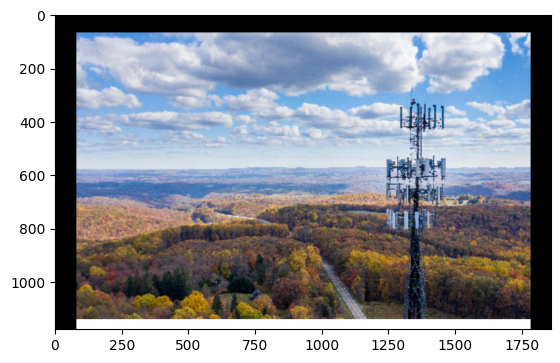

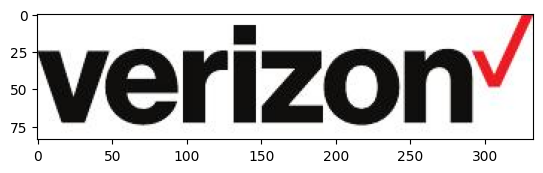

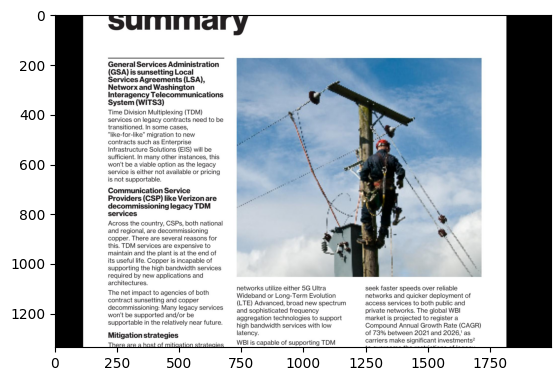

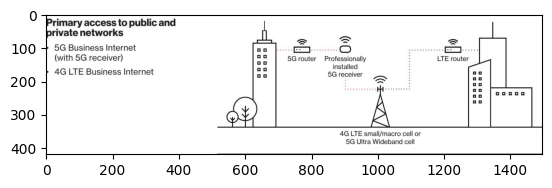

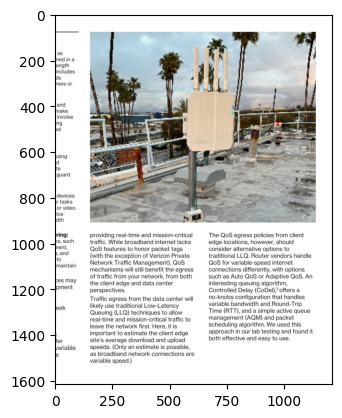

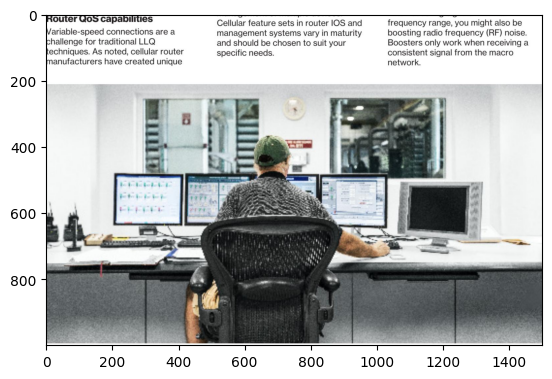

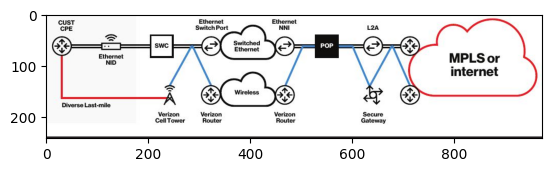

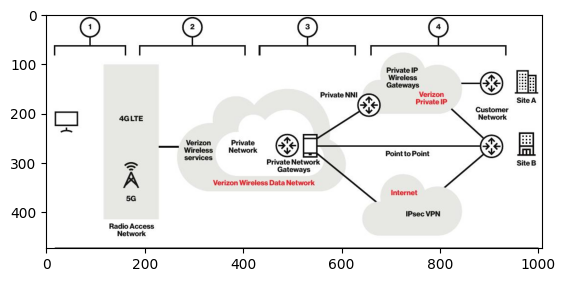

In [76]:
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt

import io
for element in raw_pdf_elements:
  # if "image_base64" in element["metadata"]:
  if "unstructured.documents.elements.Image" in str(type(element)):
      # Decode the Base64-encoded representation of the
      # processed "Image" or "Table" element into its original
      # visual representation, and then show it.
      image_bytes = base64.b64decode(element.metadata.image_base64)
      # print(image_bytes)
      image = Image.open(io.BytesIO(image_bytes))
      plt.imshow(image)
      plt.show()

In [77]:
import base64
from PIL import Image
from io import BytesIO
from pprint import pprint

# Max dimension for resizing images
MAX_IMAGE_SIZE = 512

# Resizing function for images while maintaining aspect ratio
def resize_bytes_image(image_bytes, max_size):
    image = Image.open(BytesIO(image_bytes))
    original_width, original_height = image.size

    # Resize only if larger than max_size
    if max(original_width, original_height) <= max_size:
        return image_bytes

    if original_width > original_height:
        new_width = max_size
        new_height = int((original_height / original_width) * max_size)
    else:
        new_height = max_size
        new_width = int((original_width / original_height) * max_size)

    resized_image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)

    img_byte_arr = BytesIO()
    resized_image.save(img_byte_arr, format="PNG")
    return img_byte_arr.getvalue()

# Placeholder list to store results
items = []

# Process images from Unstructured's raw elements
for element in raw_pdf_elements:
    if "unstructured.documents.elements.Image" in str(type(element)):
        # Extract and decode the base64-encoded image
        image_bytes = base64.b64decode(element.metadata.image_base64)

        # Resize the image if necessary
        resized_image_bytes = resize_bytes_image(image_bytes, MAX_IMAGE_SIZE)

        # Encode the resized image back to base64
        base64_image = base64.b64encode(resized_image_bytes).decode('utf-8')

        # Add the resized image and placeholder caption to the items list
        items.append({
            'type': 'image',
            'data': base64_image,
            'caption': "none",  # Placeholder for the caption
            'page_number': element.metadata.page_number,
            'filename': element.metadata.filename,
            'image_mime_type': element.metadata.image_mime_type,
            'coordinates': element.metadata.coordinates.to_dict(),
        })

# Display the processed items
for item in items:
    pprint(item)
    break


{'caption': 'none',
 'coordinates': {'layout_height': 2200,
                 'layout_width': 1700,
                 'points': ((-79.79425333333333, -69.29270416666655),
                            (-79.79425333333333, 1108.8598808333334),
                            (1779.7942002777777, 1108.8598808333334),
                            (1779.7942002777777, -69.29270416666655)),
                 'system': 'PixelSpace'},
 'data': 'iVBORw0KGgoAAAANSUhEUgAAAgAAAAFECAIAAADeOxFKAAEAAElEQVR4nOz9245lWZIkiImorrXPMTP3uGVkZlVl1fRt0OghCJBDELw8DcBP4Nfwb/g5fCEwJB94n+rqrqquyltEeLi72Tl7qarwQfc57tXTBKYyA10EYesh4O5hdi57r61LVVREFHhdr+t1va7X9bpe1+t6Xa/rdb2u1/W6Xtfrel2v63W9rtf1ul7X63pdr+t1va7X9bpe1+t6Xa/rdb2u1/W6Xtfrel2v63W9rtf1ul7X63pdr+t1va7X9bpe1+t6Xa/rdb2u1/W6Xtfrel2v63W9rtf1ul7X63pdr+t1va7X9bpe1+t6Xa/rdb2u1/W6Xtfrel2v63W9rtf1ul7XT734U7zGT/Ei/wPfCtB/tjf7H/YZ/lFf/v6L//ku2et6Xa/rP8v6R4WmnyICSP/k0fD/Lxf/v9ye16j9ul7X6/r/nUXaHxmWxh//CR6ffkEbAtXJMfXZUWgA+mjk7Q8QRAKkFkBxEnX8uxESJH5WVhQFggVYiYQogcfXFkDd/nDk5kwy

In [80]:
import base64
from PIL import Image
from io import BytesIO
import math

# Max dimension for resizing images
MAX_IMAGE_SIZE = 512

# Resizing function for images while maintaining aspect ratio
def resize_bytes_image(image_bytes, max_size):
    image = Image.open(BytesIO(image_bytes))
    original_width, original_height = image.size

    # Resize only if larger than max_size
    if max(original_width, original_height) <= max_size:
        return image_bytes

    if original_width > original_height:
        new_width = max_size
        new_height = int((original_height / original_width) * max_size)
    else:
        new_height = max_size
        new_width = int((original_width / original_height) * max_size)

    resized_image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)

    img_byte_arr = BytesIO()
    resized_image.save(img_byte_arr, format="PNG")
    return img_byte_arr.getvalue()

# Step 1: Create the `items` list with only images
items = []
captions = []

for element in raw_pdf_elements:
    element_type = str(type(element))
    coordinates = element.metadata.coordinates.to_dict()

    if "unstructured.documents.elements.Image" in element_type:
        # Process image
        image_bytes = base64.b64decode(element.metadata.image_base64)
        resized_image_bytes = resize_bytes_image(image_bytes, MAX_IMAGE_SIZE)
        base64_image = base64.b64encode(resized_image_bytes).decode('utf-8')
        items.append({
            "type": "image",
            "page": element.metadata.page_number,
            "filename": element.metadata.filename,
            "image_mime_type": element.metadata.image_mime_type,
            "coordinates": coordinates['points'],  # Extract points directly
            "data": base64_image,
            "caption": None  # Placeholder for the caption
        })
    elif "unstructured.documents.elements.FigureCaption" in element_type:
        # Process caption
        captions.append({
            "type": "caption",
            "page": element.metadata.page_number,
            "coordinates": coordinates['points'],  # Extract points directly
            "data": str(element)
        })

# Step 2: Match images with captions
class ImageCaptionMatcher:
    def __init__(self, images, captions, delta=150):
        self.images = images
        self.captions = captions
        self.delta = delta

    @staticmethod
    def calculate_center(coords):
        """
        Calculate the center of a bounding box given its coordinates.
        :param coords: List of (x, y) tuples.
        :return: Center coordinates as (x, y).
        """
        x = sum(coord[0] for coord in coords) / len(coords)
        y = sum(coord[1] for coord in coords) / len(coords)
        return (x, y)

    @staticmethod
    def calculate_height(coords):
        """
        Calculate the height of a bounding box given its coordinates.
        Handles unordered coordinate inputs.
        :param coords: List of (x, y) tuples.
        :return: Height of the bounding box.
        """
        y_coords = sorted([coord[1] for coord in coords])  # Sort by Y-axis
        height = y_coords[-1] - y_coords[0]  # Top to bottom
        return height

    @staticmethod
    def calculate_distance(point1, point2):
        """
        Calculate the Euclidean distance between two points.
        :param point1: First point (x1, y1).
        :param point2: Second point (x2, y2).
        :return: Euclidean distance.
        """
        return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

    def match(self):
        """
        Match images with captions based on vertical distance.
        Adds the closest caption to the `caption` field of each image.
        """
        # Group captions by page
        pages = {}
        for caption in self.captions:
            pages.setdefault(caption['page'], []).append(caption)

        for image in self.images:
            page = image['page']
            page_captions = pages.get(page, [])

            print(f"\nProcessing Image on Page {page}: {image['coordinates']}")
            print(f"Captions Available on Page {page}: {[caption['data'] for caption in page_captions]}")

            if not page_captions:
                # No captions on this page
                print("No captions found on this page.")
                continue

            img_center = self.calculate_center(image['coordinates'])
            img_height = self.calculate_height(image['coordinates'])

            print(f"Image Center: {img_center}, Image Height: {img_height}")

            closest_caption = None
            min_vertical_distance = float('inf')

            for caption in page_captions:
                caption_center = self.calculate_center(caption['coordinates'])
                vertical_distance = abs(caption_center[1] - img_center[1])  # Y-axis difference only

                allowable_vertical_distance = (img_height / 2) + self.delta
                print(f"Evaluating Caption: {caption['data']}")
                print(f"Caption Center: {caption_center}, Vertical Distance: {vertical_distance}, "
                      f"Allowable Vertical Distance: {allowable_vertical_distance}")

                if vertical_distance < min_vertical_distance and vertical_distance <= allowable_vertical_distance:
                    print(f"Caption '{caption['data']}' is closer (vertical distance: {vertical_distance}) "
                          f"than previous closest.")
                    min_vertical_distance = vertical_distance
                    closest_caption = caption

            if closest_caption:
                print(f"Closest Caption Found: {closest_caption['data']}")
                image['caption'] = closest_caption['data']
                page_captions.remove(closest_caption)  # Avoid reusing a caption
            else:
                print("No suitable caption found for this image.")

        print("\nMatching Completed")


    # def match(self):
    #     """
    #     Check centre to centre eucledean distance of image and caption and it should be within proximity.
    #     Match images with captions based on refined criteria.
    #     Adds the closest caption to the `caption` field of each image.
    #     """
    #     # Group captions by page
    #     pages = {}
    #     for caption in self.captions:
    #         pages.setdefault(caption['page'], []).append(caption)

    #     for image in self.images:
    #         page = image['page']
    #         page_captions = pages.get(page, [])

    #         print(f"\nProcessing Image on Page {page}: {image['coordinates']}")
    #         print(f"Captions Available on Page {page}: {[caption['data'] for caption in page_captions]}")

    #         if not page_captions:
    #             # No captions on this page
    #             print("No captions found on this page.")
    #             continue

    #         img_center = self.calculate_center(image['coordinates'])
    #         img_height = self.calculate_height(image['coordinates'])

    #         print(f"Image Center: {img_center}, Image Height: {img_height}")

    #         closest_caption = None
    #         min_distance = float('inf')

    #         for caption in page_captions:
    #             caption_center = self.calculate_center(caption['coordinates'])
    #             distance = self.calculate_distance(img_center, caption_center)

    #             allowable_distance = (img_height / 2) + self.delta
    #             print(f"Evaluating Caption: {caption['data']}")
    #             print(f"Caption Center: {caption_center}, Distance: {distance}, Allowable Distance: {allowable_distance}")

    #             if distance < min_distance and distance <= allowable_distance:
    #                 print(f"Caption '{caption['data']}' is closer (distance: {distance}) than previous closest.")
    #                 min_distance = distance
    #                 closest_caption = caption

    #         if closest_caption:
    #             print(f"Closest Caption Found: {closest_caption['data']}")
    #             image['caption'] = closest_caption['data']
    #             page_captions.remove(closest_caption)  # Avoid reusing a caption
    #         else:
    #             print("No suitable caption found for this image.")

    #     print("\nMatching Completed")


# Step 3: Perform the matching
matcher = ImageCaptionMatcher(items, captions)
matcher.match()

# Final `items` list with captions tagged
for item in items:
    print(item['caption'])



Processing Image on Page 1: ((-79.79425333333333, -69.29270416666655), (-79.79425333333333, 1108.8598808333334), (1779.7942002777777, 1108.8598808333334), (1779.7942002777777, -69.29270416666655))
Captions Available on Page 1: []
No captions found on this page.

Processing Image on Page 1: ((100.34650421142578, 2024.6773681640625), (100.34650421142578, 2109.040283203125), (433.45208740234375, 2109.040283203125), (433.45208740234375, 2024.6773681640625))
Captions Available on Page 1: []
No captions found on this page.

Processing Image on Page 3: ((-113.39254388888888, 270.6263224999999), (-113.39254388888888, 1607.2532813888888), (1883.2971466666665, 1607.2532813888888), (1883.2971466666665, 270.6263224999999))
Captions Available on Page 3: []
No captions found on this page.

Processing Image on Page 4: ((100.16555555555553, 446.9353942871094), (100.16555555555553, 866.5953979492188), (1595.944580078125, 866.5953979492188), (1595.944580078125, 446.9353942871094))
Captions Available on

In [145]:
# Process the PDF
raw_pdf_elements_2 = partition_pdf(
    # url=None,
    filename=filepath,
    # extract_images_in_pdf=True,
    # extract_element_types=["Image", "Table"],
    extract_image_block_types=["Image", "Table"],
    infer_table_structure=True,
    strategy="hi_res",
    extract_to_payload=True,
    extract_image_block_to_payload=True,
    chunking_strategy="by_title",
    max_characters=2000,
    new_after_n_chars=1800,
    overlap = 200,
    # combine_text_under_n_chars=1000,
    # extract_image_block_output_dir=raw_images_dir,
)


In [137]:
# To get a list of all available attributes in metadata, you can use:
metadata_attributes = vars(raw_pdf_elements_2[0].metadata)
print(metadata_attributes)

# Then you can iterate through the attribute names and access their values:
for attr_name in metadata_attributes:
    attr_value = getattr(raw_pdf_elements_2[0].metadata, attr_name)
    print(f"{attr_name}: {attr_value}")

{'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2024-12-12T10:19:17', 'page_number': 1, 'orig_elements': [<unstructured.documents.elements.Image object at 0x7a356d5f6410>, <unstructured.documents.elements.Title object at 0x7a356d5f4c40>, <unstructured.documents.elements.Title object at 0x7a34e223c5b0>, <unstructured.documents.elements.NarrativeText object at 0x7a34e1b507c0>, <unstructured.documents.elements.Image object at 0x7a356d5f64a0>, <unstructured.documents.elements.NarrativeText object at 0x7a34e1cd69e0>, <unstructured.documents.elements.Title object at 0x7a34e223e2c0>, <unstructured.documents.elements.Title object at 0x7a34e1cd4580>, <unstructured.documents.elements.Title object at 0x7a356d480ac0>, <unstructured.documents.elements.ListItem object at 0x7a356d480a90>, <unstructured.documents.elements.ListItem object at 0x7a34e1102590>, <unstructured.documents.elements.ListItem object at 0x7a34e1102260>, <unstructured.documents.elements.Title object at 0x7a

Image:
Coordinates: CoordinatesMetadata(points=((-79.79425333333333, -69.29270416666655), (-79.79425333333333, 1108.8598808333334), (1779.7942002777777, 1108.8598808333334), (1779.7942002777777, -69.29270416666655)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a356d5f5120>)
Page: 1


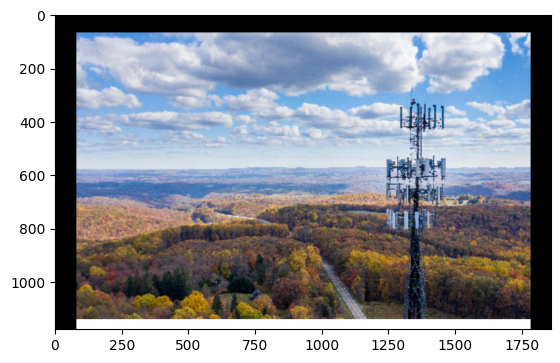

Image:
Coordinates: CoordinatesMetadata(points=((100.34650421142578, 2024.6773681640625), (100.34650421142578, 2109.040283203125), (433.45208740234375, 2109.040283203125), (433.45208740234375, 2024.6773681640625)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a356d5f56c0>)
Page: 1


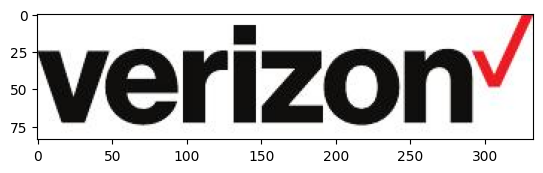

--------------------------
Image:
Coordinates: CoordinatesMetadata(points=((-113.39254388888888, 270.6263224999999), (-113.39254388888888, 1607.2532813888888), (1883.2971466666665, 1607.2532813888888), (1883.2971466666665, 270.6263224999999)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e11002b0>)
Page: 3


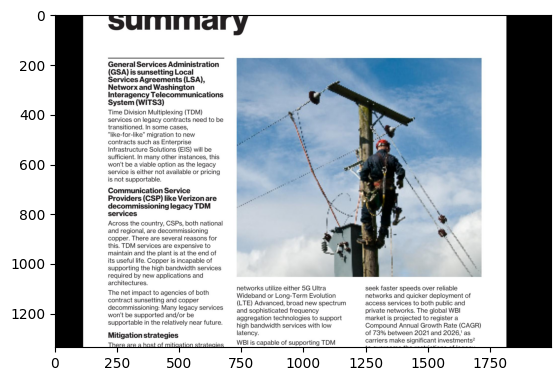

--------------------------
Image:
Coordinates: CoordinatesMetadata(points=((100.16555555555553, 446.9353942871094), (100.16555555555553, 866.5953979492188), (1595.944580078125, 866.5953979492188), (1595.944580078125, 446.9353942871094)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e1103e50>)
Page: 4


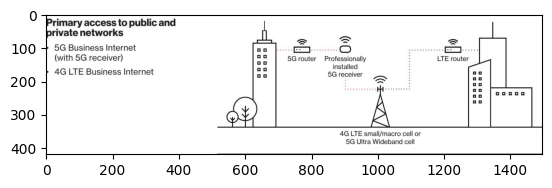

Figure Caption:
Figure 1. Primary access to public and private networks
Coordinates: CoordinatesMetadata(points=((616.642333984375, 877.4447222222223), (616.642333984375, 899.7113888888888), (1138.6444444444448, 899.7113888888888), (1138.6444444444448, 877.4447222222223)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e11022c0>)
Page: 4


--------------------------
Table:
Oﬃce in a box Connectivity for new, temporary, or home oﬃces. Often paired with voice over IP system Example: Portable plug and play router with VPN access for remote workers that is quick to deploy Secondary or Tertiary network backup. Especially crucial with a single point of entry for redundancy Network resiliency wireline downtime Branches or oﬃces with lack of, or old and expensive, wired connectivity options Remote locations Example: Enterprise grade router or adapter paired with a high gain OmnI/ Directional antenna for improved bandwidth Parallel network Connectivity that is not connect

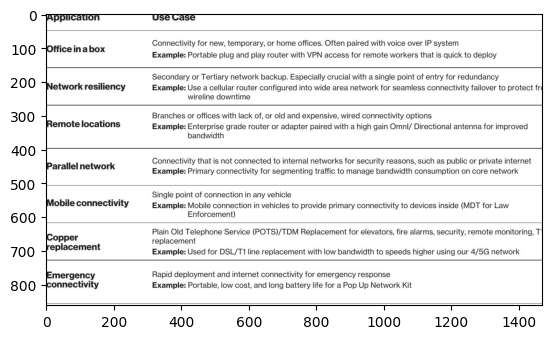



--------------------------
Image:
Coordinates: CoordinatesMetadata(points=((463.78826555555554, 368.2379827777778), (463.78826555555554, 1983.0527411111111), (1674.8993341666667, 1983.0527411111111), (1674.8993341666667, 368.2379827777778)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e1ea3490>)
Page: 5


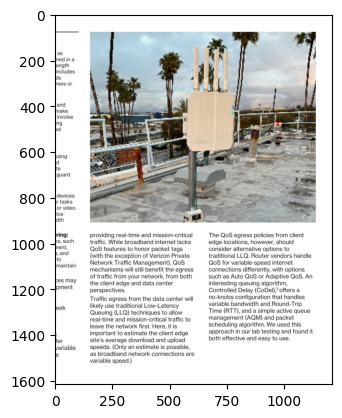

--------------------------
--------------------------
--------------------------
--------------------------
--------------------------
Image:
Coordinates: CoordinatesMetadata(points=((100.0, 885.2044), (100.0, 1885.204349722222), (1600.0, 1885.204349722222), (1600.0, 885.2044)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e254b340>)
Page: 6


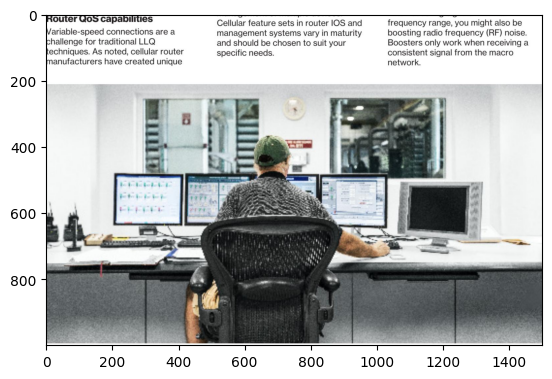

--------------------------
--------------------------
Table:
Transport technology Download (Mbps) Upload Wired DSL (median)4 8.90 1.05 35.33 Wired Cable (median) 163.81 16.06 20.94 Wired Fiber (median) 174.43 103.40 9.42 Mobile wireless Mobile cellular (average)5 76.15 13.42 40.00 Business internet Verizon LTE Business Internet (avg, 50 Mbps) 41.65 12.09 89.47 Business internet Verizon 5G Business Internet (avg, 400 Mbps) 386.33 100.33 26.37
Coordinates: CoordinatesMetadata(points=((610.7771606445312, 446.14569091796875), (610.7771606445312, 867.605224609375), (1547.40673828125, 867.605224609375), (1547.40673828125, 446.14569091796875)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a362bf8a470>)
Page: 7


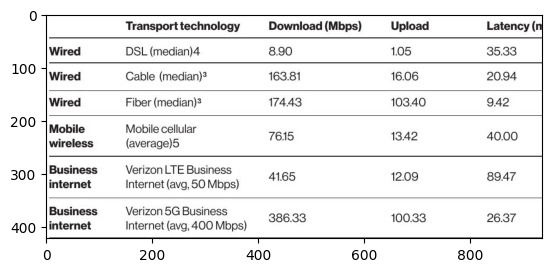



--------------------------
--------------------------
Footer:
6
--------------------------
--------------------------
Image:
Coordinates: CoordinatesMetadata(points=((621.5272827148438, 105.41596984863281), (621.5272827148438, 346.570068359375), (1596.1829833984375, 346.570068359375), (1596.1829833984375, 105.41596984863281)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e16c4340>)
Page: 8


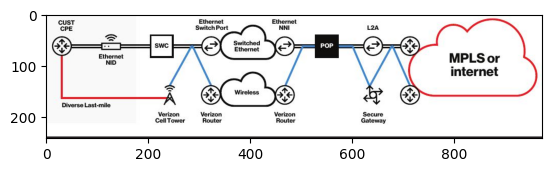

--------------------------
Figure Caption:
Figure 3. Creating last-mile network access diversity.
Coordinates: CoordinatesMetadata(points=((616.6666666666666, 354.51824951171875), (616.6666666666666, 378.3193664550781), (1118.7101802777777, 378.3193664550781), (1118.7101802777777, 354.51824951171875)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e16c6f80>)
Page: 8


--------------------------
--------------------------
--------------------------
Image:
Coordinates: CoordinatesMetadata(points=((598.9559326171875, 1499.640625), (598.9559326171875, 1973.8062744140625), (1606.740478515625, 1973.8062744140625), (1606.740478515625, 1499.640625)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e12e14b0>)
Page: 8


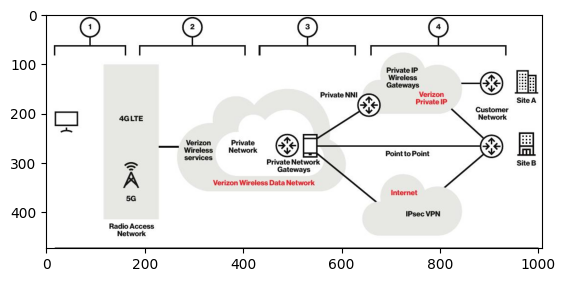

--------------------------
Figure Caption:
Figure 4. Private Network isolates traﬃc from the public internet.
Coordinates: CoordinatesMetadata(points=((614.9705810546875, 1991.26611328125), (614.9705810546875, 2015.2183333333332), (1216.4666666666667, 2015.2183333333332), (1216.4666666666667, 1991.26611328125)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7a34e1ec7f10>)
Page: 8


--------------------------
--------------------------


In [139]:
for element in raw_pdf_elements_2:
    # composite_metadata = element.metadata.to_dict()
    original_elements = element.metadata.orig_elements
    # print(original_elements)
    for ele in original_elements:
      image_bytes = ""
      if "unstructured.documents.elements.FigureCaption" in str(type(ele)):
        print("Figure Caption:")
        print(str(ele))
        print("Coordinates:",ele.metadata.coordinates)
        print("Page:",ele.metadata.page_number)
        print("\n")
      elif "unstructured.documents.elements.Table" in str(type(ele)):
        print("Table:")
        print(str(ele))
        print("Coordinates:",ele.metadata.coordinates)
        print("Page:", ele.metadata.page_number)
        # print(ele.metadata.image_base64)
        image_bytes = base64.b64decode(ele.metadata.image_base64)
        # print(image_bytes)
        image = Image.open(io.BytesIO(image_bytes))
        plt.imshow(image)
        plt.show()
        print("\n")
      elif "unstructured.documents.elements.Image" in str(type(ele)):
        print("Image:")
        print("Coordinates:",ele.metadata.coordinates)
        print("Page:",ele.metadata.page_number)
        # print(ele.metadata.image_base64)
        image_bytes = base64.b64decode(ele.metadata.image_base64)
        # print(image_bytes)
        image = Image.open(io.BytesIO(image_bytes))
        plt.imshow(image)
        plt.show()
      elif "unstructured.documents.elements.Header" in str(type(ele)):
        print("Header:")
        print(str(ele))
      elif "unstructured.documents.elements.Footer" in str(type(ele)):
        print("Footer:")
        print(str(ele))
    print("--------------------------")

In [144]:
def extract_text_from_elements(raw_pdf_elements):
    """
    Extracts text from the composite elements of the PDF, excluding captions, images, and tables.

    :param raw_pdf_elements: List of elements from the PDF partitioning process.
    :return: List of strings, where each string is a concatenated chunk of text.
    """
    text_chunks = []

    for element in raw_pdf_elements:
        composite_text = []

        if hasattr(element.metadata, 'orig_elements') and element.metadata.orig_elements:
            for ele in element.metadata.orig_elements:
                # print(type(ele))
                # Check if the element is not a caption, image, or table
                if "unstructured.documents.elements.FigureCaption" not in str(type(ele)) or \
                   "unstructured.documents.elements.Image" not in str(type(ele)) or \
                   "unstructured.documents.elements.Table" not in str(type(ele)):
                    composite_text.append(str(ele))  # Add the text representation to the composite chunk

        if composite_text:
            # Join the text from all parts of the composite element
            text_chunks.append("".join(composite_text))

    return text_chunks


In [141]:
# Extract text-only chunks
text_chunks = extract_text_from_elements(raw_pdf_elements_2)

In [142]:
from unstructured.cleaners.core import clean, group_broken_paragraphs

# Print extracted text chunks
for i, chunk in enumerate(text_chunks):
    clean_chunk = clean(group_broken_paragraphs(chunk), extra_whitespace=True, dashes=True)
    print(f"Text Chunk {i+1}:\n{chunk}\n{'-' * 50}")
    print(f"Character Count:{len(chunk)}\n{'---' * 50}")


Text Chunk 1:


Wireless business internet

Support legacy/Time Division

Multiplexing services without copper.



White paper

verizon’

Table of contents

2 Executive summary

3 Wireless business internet solutions

4 Wireless business internet best practices

6 Comparison: Wired and wireless connectivity

8 References

White paper Wireless business internet

1

Executive

summary
--------------------------------------------------
Character Count:371
------------------------------------------------------------------------------------------------------------------------------------------------------
Text Chunk 2:
General Services Administration   (GSA) is sunsetting Local   Services Agreements (LSA),   Networx and Washington   Interagency Telecommunications   System (WITS3)  Time Division Multiplexing (TDM)   services on legacy contracts need to be   transitioned. In some cases,   ”like-for-like” migration to new   contracts such as Enterprise   Infrastructure Solutions (EIS) will be 

In [126]:
from unstructured.cleaners.core import clean, group_broken_paragraphs

text = """The big brown fox
was walking down the lane.

At the end of the lane, the
fox met a bear."""

clean(group_broken_paragraphs(text), extra_whitespace=True, dashes=True, )

'The big brown fox was walking down the lane. At the end of the lane, the fox met a bear.'

from unstructured.cleaners.core import clean

# Returns "an excellent point!"
clean("● An excellent point!", bullets=True, lowercase=True)

# Returns "ITEM 1A: RISK FACTORS"
clean("ITEM 1A:     RISK-FACTORS", extra_whitespace=True, dashes=True)

